# Análise de Dados de Student Performance

Base de Dados
Cortez, Paulo. 2008. Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

Paper
Cortez, P. and A. M. Gonçalves Silva. “Using data mining to predict secondary school student performance.” (2008).


## Características dos Dados

1 school - escola do estudante (binário: "GP" - Gabriel Pereira ou "MS" - Mousinho da Silveira)<br />
2 sex - sexo do estudante (binário: "F" - feminino ou "M" - masculino)<br />
3 age - idade do estudante (numérico: de 15 a 22)<br />
4 address - tipo de endereço residencial do estudante (binário: "U" - urbano ou "R" - rural)<br />
5 famsize - tamanho da família (binário: "LE3" - menor ou igual a 3 ou "GT3" - maior que 3)<br />
6 Pstatus - status de coabitação dos pais (binário: "T" - vivendo juntos ou "A" - separados)<br />
7 Medu - escolaridade da mãe (numérico: 0 - nenhuma, 1 - ensino primário (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior)<br />
8 Fedu - escolaridade do pai (numérico: 0 - nenhuma, 1 - ensino primário (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior)<br />
9 Mjob - profissão da mãe (nominal: "professora", relacionada à "saúde", serviços "civis" (ex.: administrativo ou policial), "em_casa" ou "outro")<br />
10 Fjob - profissão do pai (nominal: "professor", relacionada à "saúde", serviços "civis" (ex.: administrativo ou policial), "em_casa" ou "outro")<br />
11 reason - motivo para escolher esta escola (nominal: próximo de "casa", "reputação" da escola, preferência pelo "curso" ou "outro")<br />
12 guardian - responsável pelo estudante (nominal: "mãe", "pai" ou "outro")<br />
13 traveltime - tempo de viagem de casa para a escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, ou 4 - >1 hora)<br />
14 studytime - tempo semanal de estudo (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas)<br />
15 failures - número de reprovações anteriores (numérico: n se 1<=n<3, caso contrário 4)<br />
16 schoolsup - suporte educacional extra (binário: sim ou não)<br />
17 famsup - suporte educacional familiar (binário: sim ou não)<br />
18 paid - aulas extras pagas dentro da disciplina do curso (Matemática ou Português) (binário: sim ou não)<br />
19 activities - atividades extracurriculares (binário: sim ou não)<br />
20 nursery - frequentou escola infantil (binário: sim ou não)<br />
21 higher - deseja cursar ensino superior (binário: sim ou não)<br />
22 internet - acesso à Internet em casa (binário: sim ou não)<br />
23 romantic - em um relacionamento amoroso (binário: sim ou não)<br />
24 famrel - qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)<br />
25 freetime - tempo livre após a escola (numérico: de 1 - muito baixo a 5 - muito alto)<br />
26 goout - sair com amigos (numérico: de 1 - muito baixo a 5 - muito alto)<br />
27 Dalc - consumo de álcool durante a semana (numérico: de 1 - muito baixo a 5 - muito alto)<br />
28 Walc - consumo de álcool no final de semana (numérico: de 1 - muito baixo a 5 - muito alto)<br />
29 health - estado atual de saúde (numérico: de 1 - muito ruim a 5 - muito bom)<br />
30 absences - número de faltas escolares (numérico: de 0 a 93)<br />

## Importações de bibliotecas
Importe as bibliotecas de análise de dados e do sklearn para classificação

In [2]:
# Importação de bibliotecas para análise de dados
import pandas as pd
import numpy as np
# Importação de bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
# Importação de bibliotecas do sklearn para classificação
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Leitura do arquivo em CSV
Leia o arquivo student-mat.csv e armazene os dados em um DataFrame


In [3]:
# Leia o arquivo csv student-mat.csv
df = pd.read_csv('student-mat.csv', sep=';')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Tratamento dos Dados

### Identificar valores nulos
Verificar a existência de valores ausentes

In [5]:
# Verificar se existem valores nulos em df
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Identificar valores categóricos
Identificar as colunas categóricas e colocar em uma lista

In [7]:
# Identificar colunas categóricas e armazenar em uma lista
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Exibir as colunas categóricas
print(f"Colunas categóricas: {categorical_columns}")

Colunas categóricas: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


Aplicar one-hot enconding

In [8]:
# Aplicar one-hot encoding nas colunas categóricas
df = pd.get_dummies(df, columns=categorical_columns)

# Exibir as 5 primeiras linhas do DataFrame
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


#### Criar coluna pass_fail

In [9]:
# Crie em df uma coluna pass_fail a partir da nota de G3
# Se G3 >= 10, então 'pass', caso contrário 'fail'
df['pass_fail'] = np.where(df['G3'] >= 10, 'pass', 'fail')

In [11]:
# Exibir as 5 primeiras linhas das colunas G3 e pass_fail
print(df[['G3', 'pass_fail']].head())

   G3 pass_fail
0   6      fail
1   6      fail
2  10      pass
3  15      pass
4  10      pass


## Análise dos dados

### Correlação entre as notas

Calcular a correlação entre G1, G2 e G3 e apresentar o resultado em gráfico de calor e analisar os resultados

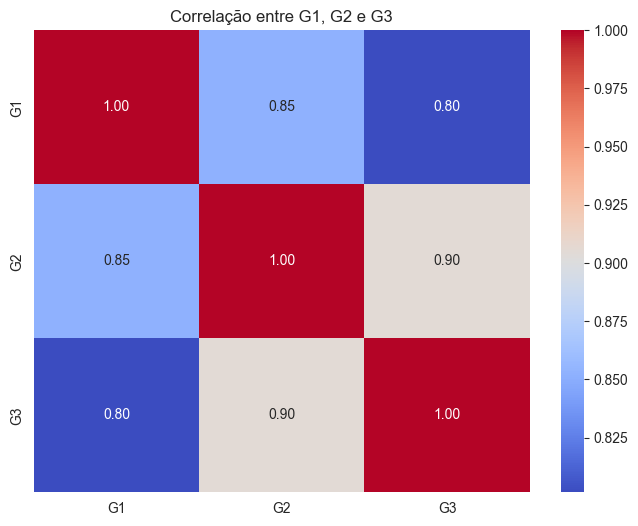

In [13]:
# Calcular a correlação entre G1, G2 e G3 e apresentar em um gráfico de calor
correlation = df[['G1', 'G2', 'G3']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre G1, G2 e G3')
plt.show()

Nota média por tempo de estudo (study time) - *Chat

In [14]:
# Calcular a média de G3 por tempo de estudo
mean_g3_by_study_time = df.groupby('studytime')['G3'].mean().reset_index()
# Exibir a média de G3 por tempo de estudo
print(mean_g3_by_study_time)

   studytime         G3
0          1  10.047619
1          2  10.171717
2          3  11.400000
3          4  11.259259


# Feature Selection
Mutual info classification do sklearn

In [15]:
#  Apresente as 10 variáveis mais importantes para a classificação utilizando o mutual info classification
from sklearn.feature_selection import mutual_info_classif

# Separar as variáveis independentes (X) e a variável dependente (y)
# Remova apenas a coluna G3 e a coluna pass_fail
X = df.drop(columns=['G3', 'pass_fail'])
y = df['G3']

# Calcular a importância das variáveis
mutual_info = mutual_info_classif(X, y, discrete_features=True)
# Criar um DataFrame com as variáveis e suas importâncias
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mutual_info})

# Ordenar o DataFrame pela importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Exibir as 10 variáveis mais importantes
print(importance_df.head(10))



     Feature  Importance
14        G2    1.422767
13        G1    0.914258
12  absences    0.578319
5   failures    0.150042
0        age    0.113711
10      Walc    0.110130
1       Medu    0.097282
8      goout    0.096442
9       Dalc    0.095026
11    health    0.085802
